In [ ]:
#### Importing the essential libraries ######

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [2]:
Leukemia_data = pd.read_csv('C:\\Users\\SAHANA\\Documents\\Data Analysis Projects\\Leukemia_GSE9476.csv')

In [ ]:
## reading the head of the data ##

In [3]:
data = Leukemia_data.head()
data

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [ ]:
## checking for missing values ##

In [4]:
Leukemia_data.isna().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 22285, dtype: int64

# Data Pre-processing

In [ ]:
## getting rid of unnecessary columns ##

In [3]:
Leukemia_data = Leukemia_data.drop(['samples'], axis = 1)

In [4]:
## Standardizing the features, except the target variable 'Type' ##

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Leukemia_data.iloc[:, 1:])
Leukemia_data.iloc[:, 1:] = scaler.transform(Leukemia_data.iloc[:, 1:])

In [6]:
## separating the target variable ##

In [5]:
y_df = Leukemia_data['type']  
x_df = Leukemia_data.drop(['type'], axis = 1)

# Principal Component Analysis

In [120]:
## Dimension Reduction using Principal Component Analysis ##
# Redusing the number of features from ~22,000 to 50 principal components, which are formed by linear combination of all 22,000 features.

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA (n_components = 50)
principal_components = pca.fit_transform(x_df)

In [8]:
x_df = pd.DataFrame(data = principal_components)  # forming new x_df with 50 principal components
finaldataframe = pd.concat([y_df, x_df], axis = 1)  # final data frame formed by 50 principal components and target variable

In [11]:
## total variance explained by the 50 Principal Components ##

In [17]:
pca.explained_variance_

array([4408.04140712, 3337.56208476, 1557.10256334, 1409.48167276,
       1111.40918024,  774.1911809 ,  661.42952346,  591.67022815,
        542.70217127,  480.79016282,  442.47512188,  406.19865776,
        319.05124829,  284.31383669,  280.34581964,  271.42246212,
        257.10270905,  234.44101154,  228.39374495,  222.9733227 ,
        212.80620203,  207.82810764,  198.04511525,  183.13483083,
        178.81518234,  170.17251598,  167.50371608,  158.9576005 ,
        154.72199218,  144.37177182,  138.92740287,  136.64650597,
        132.9865732 ,  129.804119  ,  126.86020296,  124.39690784,
        119.83167304,  116.38121597,  110.34864075,  107.4274426 ,
        106.18025311,  105.29247623,  102.85392452,   99.87107051,
         97.21645979,   95.46040237,   89.51615472,   85.82225297,
         82.34340766,   79.82376895])

In [12]:
pca.explained_variance_ratio_.sum()  # 96% of total variance is explained by the 50 principal components

0.9623950278417515

In [ ]:
##### Comprehending the important genes contributing maximum to the principal components #####

In [27]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
features = Leukemia_data.drop(['type'], axis = 1)
initial_feature_names = features.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,221570_s_at
1,PC1,201877_s_at
2,PC2,37793_r_at
3,PC3,219627_at
4,PC4,218050_at
5,PC5,212198_s_at
6,PC6,201480_s_at
7,PC7,202147_s_at
8,PC8,217085_at
9,PC9,87100_at


In [ ]:
### Plotting the scree plot

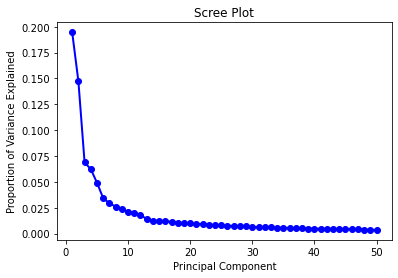

In [13]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
##### using pca library, and comprehending most impactful and least impactful genes amongst the 50 principal components #####

In [45]:
#from pca import pca
#model = pca(n_components = 50)
#out = model.fit_transform(features)

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(out['topfeat'])

In [ ]:
##Key takeaways from PCA:

# Prediction of target variable using Machine Learning

In [ ]:
## Model 1 : Logistic Regression, 70-30 train test split, L2 penalty.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.33, random_state=1)
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(multi_class='multinomial', penalty='l2', solver = 'newton-cg' )
Model = Classifier.fit(X_train, y_train)
y_pred_logit = Model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [49]:
### Printing the classification report ###

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logit))

                  precision    recall  f1-score   support

             AML       1.00      0.91      0.95        11
     Bone_Marrow       1.00      1.00      1.00         1
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      1.00      1.00         4
       PBSC_CD34       0.80      1.00      0.89         4

        accuracy                           0.95        22
       macro avg       0.96      0.98      0.97        22
    weighted avg       0.96      0.95      0.96        22



In [51]:
### Printing the Confusion Matrix ###


In [52]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_logit)
print(cm)
accuracy_score(y_test,y_pred_logit)

[[10  0  0  0  1]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]


0.9545454545454546

In [ ]:
#### Performance summary of Logistic Regression ####

In [54]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Model.score(X_test, y_test)))
print('\n************' * 2)
print('\nCONFUSION MATRIX\n')
print(confusion_matrix(y_test, y_pred_logit))

print('\n************' * 2)
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_logit))

Accuracy of logistic regression classifier on test set: 0.95

************
************

CONFUSION MATRIX

[[10  0  0  0  1]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]

************
************

CLASSIFICATION REPORT

                  precision    recall  f1-score   support

             AML       1.00      0.91      0.95        11
     Bone_Marrow       1.00      1.00      1.00         1
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      1.00      1.00         4
       PBSC_CD34       0.80      1.00      0.89         4

        accuracy                           0.95        22
       macro avg       0.96      0.98      0.97        22
    weighted avg       0.96      0.95      0.96        22



In [ ]:
## Logistic Regression using K fold cross validation ##

In [55]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, shuffle=True, random_state=1)
model_with_cv = LogisticRegression(multi_class='multinomial', penalty='l2', solver = 'lbfgs' )
scores = cross_val_score(model_with_cv, x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of LR with K fold cross validation is : %.3f (%.3f)' % (mean(scores), std(scores)))
   

Accuracy of LR with K fold cross validation is : 0.969 (0.062)


In [ ]:
### Logistic Regression using repeated K fold cross validation ###


In [56]:
from sklearn.model_selection import RepeatedKFold
repeated_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model_with_repeated_cv = LogisticRegression(multi_class='ovr', penalty='l2', solver = 'lbfgs' )
scores = cross_val_score(model_with_cv, x_df, y_df, scoring='accuracy', cv=repeated_cv, n_jobs=-1)
print('Accuracy of LR using repeated k fold cross validation is : %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of LR using repeated k fold cross validation is : 0.973 (0.060)


In [ ]:
#### Model 2: Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_NB = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n************' * 2)
print('\nCONFUSION MATRIX\n')
print(confusion_matrix(y_test, y_pred_NB))

print('\n************' * 2)
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_NB))

Accuracy of Naive Bayes classifier on test set: 0.82

************
************

CONFUSION MATRIX

[[10  0  0  1  0]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 3  0  0  0  1]]

************
************

CLASSIFICATION REPORT

                  precision    recall  f1-score   support

             AML       0.77      0.91      0.83        11
     Bone_Marrow       1.00      1.00      1.00         1
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       0.80      1.00      0.89         4
       PBSC_CD34       1.00      0.25      0.40         4

        accuracy                           0.82        22
       macro avg       0.91      0.83      0.82        22
    weighted avg       0.85      0.82      0.79        22



In [ ]:
#### Model 3 : Support Vector Machines ####

In [59]:
from sklearn import svm
svc = svm.SVC
sigmoid = svc(kernel='sigmoid', C = 1,degree = 2, gamma = 'scale', decision_function_shape='ovo').fit(X_train, y_train)  #### Sigmoid as kernel
y_pred_rbf = rbf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(sigmoid.score(X_test, y_test)))
print('\n************' * 2)
print('\nCONFUSION MATRIX\n')
print(confusion_matrix(y_test, y_pred_rbf))

print('\n************' * 2)
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_rbf))


Accuracy of logistic regression classifier on test set: 0.95

************
************

CONFUSION MATRIX

[[10  0  0  0  1]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]

************
************

CLASSIFICATION REPORT

                  precision    recall  f1-score   support

             AML       1.00      0.91      0.95        11
     Bone_Marrow       1.00      1.00      1.00         1
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      1.00      1.00         4
       PBSC_CD34       0.80      1.00      0.89         4

        accuracy                           0.95        22
       macro avg       0.96      0.98      0.97        22
    weighted avg       0.96      0.95      0.96        22



In [ ]:
#### SVM using Radial Basis Function and K fold cross validation #####

In [58]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
SVM_with_cv = svc(kernel='rbf', C = 1,degree = 3, gamma = 'scale', decision_function_shape='ovo').fit(X_train, y_train)
scores = cross_val_score(SVM_with_cv, x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVM Classifier with radial basis function as kernel and cross validayion is : %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of SVM Classifier with radial basis function as kernel and cross validayion is : 0.921 (0.079)


In [ ]:
#### Recursive feature elimination and ensemble methods #####

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
rfe_XG = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=50)
rfe_randomforest = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model1 = rfe_XG.fit(X_train, y_train)
model2 = rfe_randomforest.fit(X_train, y_train)
y_pred_rfe_XG= model1.predict(X_test)
y_pred_rfe_randomforest= model2.predict(X_test)
print('Accuracy of XGBoost with RFE on test set: {:.2f}'.format(model1.score(X_test, y_test)))
print('\n************' * 2)
print('\nCONFUSION MATRIX\n')
print(confusion_matrix(y_test, y_pred_rfe_XG))

print('\n************\n' * 2)
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_rfe_XG))
print('\n************\n' * 4)

print('Accuracy of Random Forest with RFE on test set: {:.2f}'.format(model2.score(X_test, y_test)))
print('\n************' * 2)
print('\nCONFUSION MATRIX\n')
print(confusion_matrix(y_test, y_pred_rfe_randomforest))

print('\n************\n' * 2)
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_rfe_randomforest))
print('\n************\n' * 4)




Accuracy of XGBoost with RFE on test set: 0.91

************
************

CONFUSION MATRIX

[[11  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 1  0  0  3  0]
 [ 1  0  0  0  3]]

************

************


CLASSIFICATION REPORT

                  precision    recall  f1-score   support

             AML       0.85      1.00      0.92        11
     Bone_Marrow       1.00      1.00      1.00         1
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      0.75      0.86         4
       PBSC_CD34       1.00      0.75      0.86         4

        accuracy                           0.91        22
       macro avg       0.97      0.90      0.93        22
    weighted avg       0.92      0.91      0.91        22


************

************

************

************

Accuracy of Random Forest with RFE on test set: 0.86

************
************

CONFUSION MATRIX

[[10  1  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0